# Jupyter notebook to test different models and hyperparemeter tune them

## Upload Train and Test dataset

In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd

train_data_final =  pd.read_csv('train_final.csv').dropna().drop_duplicates(subset='tweetText')
#train_label = train_data.label.to_numpy()
#train_features = train_data.tweetText.to_numpy()
test_data_final =  pd.read_csv('test_final.csv')
test_features_final = test_data_final.tweetText.to_numpy()
test_label_final = test_data_final.label.to_numpy()


## Generate feature by counting the frequency i.e CountVectoriser and TF-IDF vectoriser 
### Compares the result of the vectorisers using multinomialNB as the default model

In [2]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfidf = TfidfVectorizer()
countf = CountVectorizer()
X_train,X_test,y_train,y_test = train_test_split(train_data_final.tweetText.to_numpy(), train_data_final.label.to_numpy(), test_size=0.2)

def features(char_vectorizer,X_train,X_test,y_train,y_test):
    train_char_features = char_vectorizer.fit_transform(X_train)
    test_char_features = char_vectorizer.transform(X_test)
    le = preprocessing.LabelEncoder()
    train_label_encoded = le.fit_transform(y_train)
    test_label_encoded = le.transform(y_test)
    print(dict(zip(le.classes_, range(len(le.classes_)))))
    mnb = MultinomialNB()
    mnb.fit(train_char_features , train_label_encoded)
    y_pred = mnb.predict(test_char_features)
    print(f1_score(y_pred,test_label_encoded,average='binary',pos_label=0))
    print(confusion_matrix(y_pred,test_label_encoded))
    return f1_score(y_pred,test_label_encoded,average='binary',pos_label=0)

features(tfidf,X_train,X_test,y_train,y_test)
features(countf,X_train,X_test,y_train,y_test)

{'fake': 0, 'real': 1}
0.9135071090047393
[[1542  278]
 [  14  358]]
{'fake': 0, 'real': 1}
0.9275184275184275
[[1510  190]
 [  46  446]]


0.9275184275184275

### Compares using word based tf-idf vectoriser to character based tf-idf vectoriser using the previously implemented model

In [3]:
tfidf_char = TfidfVectorizer(analyzer='char')
tfidf_word = TfidfVectorizer(analyzer='word')
features(tfidf_char,X_train,X_test,y_train,y_test)
features(tfidf_word,X_train,X_test,y_train,y_test)

{'fake': 0, 'real': 1}
0.8303094983991463
[[1556  636]
 [   0    0]]
{'fake': 0, 'real': 1}
0.9135071090047393
[[1542  278]
 [  14  358]]


0.9135071090047393

## Implements a method to compare different models based on the precision, recall, f1 score and support

In [4]:
from sklearn.metrics import precision_recall_fscore_support, recall_score, precision_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

def features_model(char_vectorizer, X_train,X_test,y_train,y_test,f1_scores):
    train_char_features = char_vectorizer.fit_transform(X_train)
    test_char_features = char_vectorizer.transform(X_test)
    le = preprocessing.LabelEncoder()
    train_label_encoded = le.fit_transform(y_train)
    test_label_encoded = le.transform(y_test)
    mnb = MultinomialNB()
    mnb.fit(train_char_features , train_label_encoded)
    y_pred = mnb.predict(test_char_features)
    mb = f1_score(y_pred,test_label_encoded,average='binary',pos_label=0)
    mb_recall  = recall_score(y_pred,test_label_encoded,average='binary',pos_label=0)
    mb_precision = precision_score(y_pred,test_label_encoded,average='binary',pos_label=0)
    f1_scores[(x,y,mnb)] = (mb,mb_precision,mb_recall)
    log_reg = LogisticRegression()
    log_reg.fit(train_char_features , train_label_encoded)
    y_pred = log_reg.predict(test_char_features)
    log_r = f1_score(y_pred,test_label_encoded,average='binary',pos_label=0)
    log_r_recall  = recall_score(y_pred,test_label_encoded,average='binary',pos_label=0)
    log_r_precision = precision_score(y_pred,test_label_encoded,average='binary',pos_label=0)
    f1_scores[(x,y,log_reg)] = (log_r,log_r_precision,log_r_recall)
    svc = LinearSVC()
    svc.fit(train_char_features , train_label_encoded)
    y_pred = svc.predict(test_char_features)
    l_svc = f1_score(y_pred,test_label_encoded,average='binary',pos_label=0)
    svc_recall  = recall_score(y_pred,test_label_encoded,average='binary',pos_label=0)
    svc_precision = precision_score(y_pred,test_label_encoded,average='binary',pos_label=0)
    f1_scores[(x,y,svc)] = (l_svc,svc_precision,svc_recall)



In [5]:
import numpy as np
def vectoriser(x,y,z):
    return TfidfVectorizer(
        analyzer='char',
        max_df= z,
        ngram_range=(x,y)
    )

In [16]:
f1_scores = {}
for x in np.arange(1,10,1):
        for y in np.arange(x,10,1):
            print('(' + str(x) + ',' + str(y) +')')
            model = features_model(vectoriser(x, y, 0.8),X_train,X_test,y_train,y_test,f1_scores)
            print(f1_scores)


(1,1)
{(1, 1, MultinomialNB()): (0.8167567567567567, 1.0, 0.6902695294655093), (1, 1, LogisticRegression()): (0.8150028200789623, 0.9563203176704169, 0.7100737100737101), (1, 1, LinearSVC()): (0.8151048951048951, 0.9642620780939775, 0.7059108527131783)}
(1,2)
{(1, 1, MultinomialNB()): (0.8167567567567567, 1.0, 0.6902695294655093), (1, 1, LogisticRegression()): (0.8150028200789623, 0.9563203176704169, 0.7100737100737101), (1, 1, LinearSVC()): (0.8151048951048951, 0.9642620780939775, 0.7059108527131783), (1, 2, MultinomialNB()): (0.8597860653368025, 0.9841164791528789, 0.7633470225872689), (1, 2, LogisticRegression()): (0.891439205955335, 0.9510258107213766, 0.8388791593695272), (1, 2, LinearSVC()): (0.8929024081115337, 0.9324950363997353, 0.8565349544072949)}
(1,3)
{(1, 1, MultinomialNB()): (0.8167567567567567, 1.0, 0.6902695294655093), (1, 1, LogisticRegression()): (0.8150028200789623, 0.9563203176704169, 0.7100737100737101), (1, 1, LinearSVC()): (0.8151048951048951, 0.9642620780939775

### Finds the best model based on f1_score then precision then recall for all possible n-gram combination between 0-10

In [17]:
answer = {k: v for k, v in sorted(f1_scores.items(), key=lambda item: item[1][0], reverse=True)}
print(answer)
best_model = next(iter(answer))

{(8, 8, LinearSVC()): (0.9340974212034385, 0.970880211780278, 0.9), (9, 9, LinearSVC()): (0.9340974212034385, 0.970880211780278, 0.9), (1, 9, LinearSVC()): (0.9340554316661358, 0.9702183984116479, 0.9004914004914005), (2, 9, LinearSVC()): (0.9340554316661358, 0.9702183984116479, 0.9004914004914005), (5, 9, LinearSVC()): (0.9339712918660288, 0.9688947716743879, 0.9014778325123153), (8, 9, LinearSVC()): (0.9338001273074474, 0.970880211780278, 0.8994481912936848), (7, 8, LinearSVC()): (0.933375836786739, 0.9688947716743879, 0.9003690036900369), (7, 9, LinearSVC()): (0.9333333333333333, 0.9682329583057577, 0.9008620689655172), (6, 9, LinearSVC()): (0.9332907756144271, 0.9675711449371277, 0.9013563501849569), (3, 9, LinearSVC()): (0.9330357142857141, 0.9682329583057577, 0.9003076923076923), (4, 9, LinearSVC()): (0.9329929802169751, 0.9675711449371277, 0.9008009858287123), (4, 5, LinearSVC()): (0.932652409830833, 0.9669093315684977, 0.9007398273736128), (3, 5, LinearSVC()): (0.93260938997125

## Based on the model used in comparing the word vectoriser and character vectoriser, compares the different ways of preprocessing the data.

In [14]:
import os
for root, dirs, files in os.walk("train_dataset", topdown=False):
   for name in files:
       print(name)
       train_data_final =  pd.read_csv(root+'/' + name).dropna().drop_duplicates(subset='tweetText')
       train_data_final['label'] = train_data_final.label.apply(lambda  x : 'fake' if x == 'humor' else x )
       X_train,X_test,y_train,y_test = train_test_split(train_data_final.tweetText.to_numpy(), train_data_final.label.to_numpy(), test_size=0.2)
       features(vectoriser(4, 8, 0.8),X_train,X_test,y_train,y_test)

train_emoji.csv
{'fake': 0, 'real': 1}
0.8840353614144567
[[1700  438]
 [   8  329]]
train_lemmatise.csv
{'fake': 0, 'real': 1}
0.8703563305534495
[[1722  508]
 [   5  240]]
train_link.csv
{'fake': 0, 'real': 1}
0.8902750212645307
[[1570  378]
 [   9  346]]
train_lower.csv
{'fake': 0, 'real': 1}
0.887848035389019
[[1706  426]
 [   5  339]]
train_punct.csv
{'fake': 0, 'real': 1}
0.8918425853531404
[[1711  410]
 [   5  350]]
train_tag.csv
{'fake': 0, 'real': 1}
0.8808101791742404
[[1696  444]
 [  15  321]]
train_translations.csv
{'fake': 0, 'real': 1}
0.8904320987654321
[[1731  417]
 [   9  319]]


### Based on the model used in comparing the word vectoriser and character vectoriser, compares the different ways of preprocessing the data to the original dataset.

In [15]:
train_data_final = pd.read_table("assignment-comp3222-comp6246-mediaeval2015-dataset/mediaeval-2015-trainingset.txt", sep="\t",header=0).dropna()
train_data_final['label'] = train_data_final.label.apply(lambda  x : 'fake' if x == 'humor' else x )
X_train,X_test,y_train,y_test = train_test_split(train_data_final.tweetText.to_numpy(), train_data_final.label.to_numpy(), test_size=0.2)
features(vectoriser(4, 8, 0.8),X_train,X_test,y_train,y_test)

{'fake': 0, 'real': 1}
0.9144100580270793
[[1891  344]
 [  10  611]]


0.9144100580270793

In [16]:
train_data_final = pd.read_csv("train_final.csv")
X_train,X_test,y_train,y_test = train_test_split(train_data_final.tweetText.to_numpy(), train_data_final.label.to_numpy(), test_size=0.2)
features(vectoriser(4, 8, 0.8),X_train,X_test,y_train,y_test)

{'fake': 0, 'real': 1}
0.8963680387409201
[[1851  404]
 [  24  577]]


0.8963680387409201

## Compares the best version of each model to each other to see what models performs the best given the current task

In [18]:
vector = vectoriser(3,7,0.8)
train = vector.fit_transform(train_data_final.tweetText.to_numpy())
test_features = vector.transform(test_features_final)
le = preprocessing.LabelEncoder()
train_label_encoded = le.fit_transform(train_data_final.label.to_numpy())
test_label_encoded = le.transform(test_label_final)
print(dict(zip(le.classes_, range(len(le.classes_)))))
svc = LogisticRegression()
svc.fit(train,train_label_encoded)
y_pred = svc.predict(test_features)
print(f1_score(y_pred,test_label_encoded,average='binary',pos_label=0))
print(recall_score(y_pred,test_label_encoded,average='binary',pos_label=0))
print(precision_score(y_pred,test_label_encoded,average='binary',pos_label=0))


{'fake': 0, 'real': 1}
0.8206664170722576
0.7839771101573677
0.8609583660644148


In [19]:
vector = vectoriser(4,9,0.8)
train = vector.fit_transform(train_data_final.tweetText.to_numpy())
test_features = vector.transform(test_features_final)
le = preprocessing.LabelEncoder()
train_label_encoded = le.fit_transform(train_data_final.label.to_numpy())
test_label_encoded = le.transform(test_label_final)
print(dict(zip(le.classes_, range(len(le.classes_)))))
svc = LinearSVC()
svc.fit(train,train_label_encoded)
y_pred = svc.predict(test_features)
print(f1_score(y_pred,test_label_encoded,average='binary',pos_label=0))
print(recall_score(y_pred,test_label_encoded,average='binary',pos_label=0))
print(precision_score(y_pred,test_label_encoded,average='binary',pos_label=0))

{'fake': 0, 'real': 1}
0.8005958714620133
0.873664653971203
0.7388059701492538


In [8]:
vector = vectoriser(8,8,0.8)
train = vector.fit_transform(train_data_final.tweetText.to_numpy())
test_features = vector.transform(test_features_final)
le = preprocessing.LabelEncoder()
train_label_encoded = le.fit_transform(train_data_final.label.to_numpy())
test_label_encoded = le.transform(test_label_final)
print(dict(zip(le.classes_, range(len(le.classes_)))))
svc = MultinomialNB()
svc.fit(train,train_label_encoded)
y_pred = svc.predict(test_features)
print(f1_score(y_pred,test_label_encoded,average='binary',pos_label=0))
print(recall_score(y_pred,test_label_encoded,average='binary',pos_label=0))
print(precision_score(y_pred,test_label_encoded,average='binary',pos_label=0))

{'fake': 0, 'real': 1}
0.9311875693673696
0.8800699300699301
0.9886095836606441


## Build the confusion matrix for the best model i.e Multinomial NB

In [26]:
c_m = confusion_matrix(test_label_encoded,y_pred,normalize='true')
labels = ['fake','real']

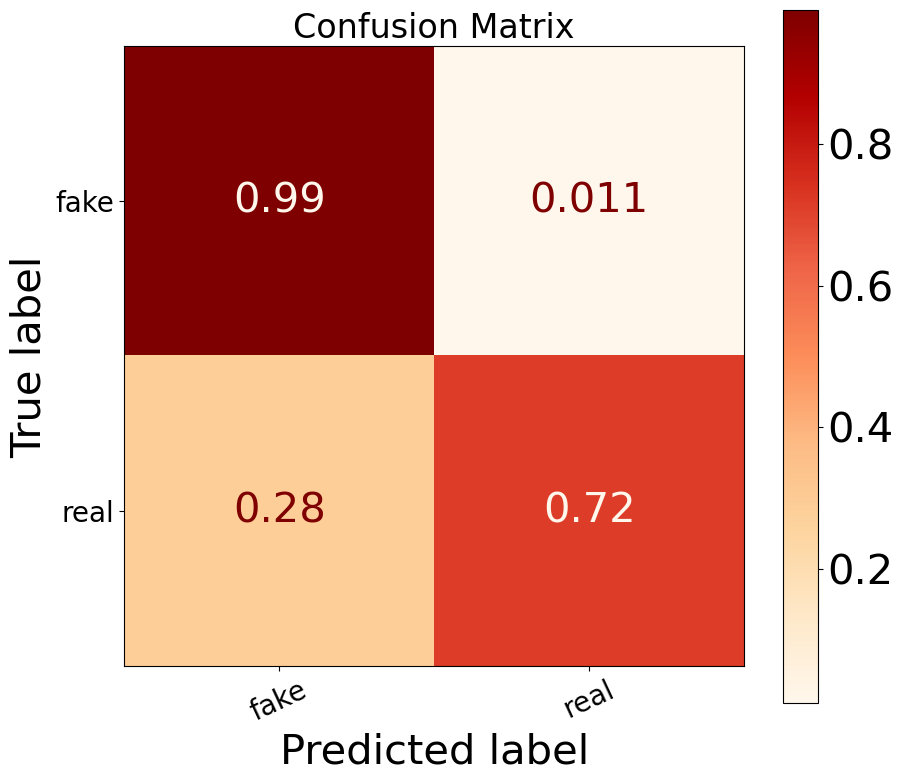

In [33]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline
import matplotlib.pyplot as plt

# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 30

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)


# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)


# Saving plot
plt.savefig('confusion_matrix.png', transparent=False, dpi=500)


# Showing the plot
plt.show()